In [1]:
!pip install itables;

In [2]:
import itables.options as opt

from functools import partial
from itables import init_notebook_mode, show

from lfm_data_utilities.model_evaluations.yogo.rank_yogo_loss import (
    get_loss_df,
    show_image,
    select_top_n_paths,
)
from lfm_data_utilities.malaria_labelling.generate_tasks_from_list import (
    make_yogo_label_dir,
)

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [3]:
PATH_TO_MODEL = (
    "/hpc/projects/flexo/MicroscopyData/Bioengineering"
    "/LFM_scope/yogo_models/honest-sweep-51/best.pth"
)

# I think I may need to put this dataset defn. file somewhere else
PATH_TO_ALL_LABELLED_DATA_DDF = (
    "/home/axel.jacobsen/celldiagnosis/dataset_defs/all-labelled-data-train-only.yml"
)

In [4]:
df = get_loss_df(PATH_TO_ALL_LABELLED_DATA_DDF, PATH_TO_MODEL)

calculating loss: 100%|██████████| 6355/6355 [00:52<00:00, 121.76it/s]


In [5]:
show_image = partial(show_image, df=df, path_to_pth=PATH_TO_MODEL)

opt.maxRows = len(df)
opt.maxBytes = 2500000000

In [6]:
show(df)

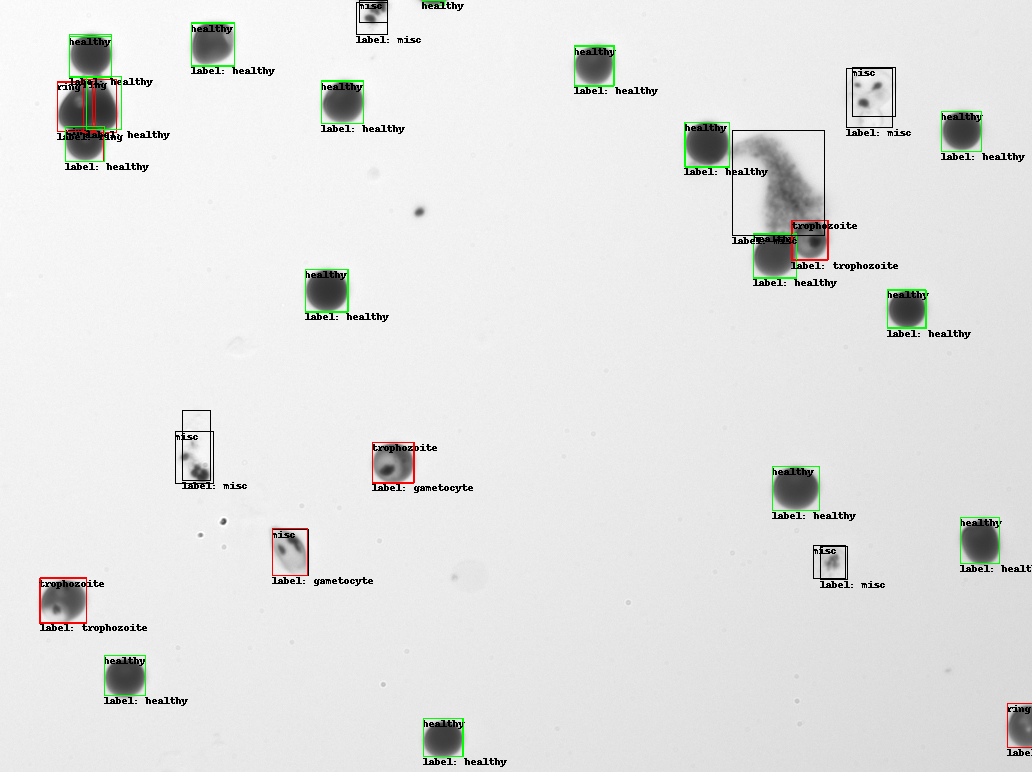

In [13]:
show_image(5903)

In [8]:
image_label_paths = select_top_n_paths(
    col_name="total_loss", n=300, df=df, ascending=False
)

In [9]:
make_yogo_label_dir("/hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections", image_label_paths)

  0%|          | 0/1 [00:00<?, ?it/s]INFO:root:Reading YOLO notes and categories from /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections
INFO:root:Found 7 categories
INFO:root:Converting labels from /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/labels
INFO:root:image extensions->, ['.png']
INFO:root:Saving Label Studio JSON to /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/tasks.json
INFO:root:
  1. Create a new project in Label Studio
  2. Use Labeling Config from "/hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/tasks.label_config.xml"
  3. Setup serving for images [e.g. you can use Local Storage (or others):
     https://labelstud.io/guide/storage.html#Local-storage]
  4. Import "/hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/tasks.json" to the project

100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
